# Regression Model Validation - Lab

## Introduction

In this lab, you'll be able to validate your model using train-test-split.


## Objectives

You will be able to:

- Calculate the mean squared error (MSE) as a measure of predictive performance
- Validate the model using the test data


## Let's use our Boston Housing Data again!

This time, let's only include the variables that were previously selected using recursive feature elimination. We included the code to preprocess below.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_boston

boston = load_boston()

boston_features = pd.DataFrame(boston.data, columns = boston.feature_names)
b = boston_features["B"]
logdis = np.log(boston_features["DIS"])
loglstat = np.log(boston_features["LSTAT"])

# minmax scaling
boston_features["B"] = (b-min(b))/(max(b)-min(b))
boston_features["DIS"] = (logdis-min(logdis))/(max(logdis)-min(logdis))

#standardization
boston_features["LSTAT"] = (loglstat-np.mean(loglstat))/np.sqrt(np.var(loglstat))

In [3]:
X = boston_features[['CHAS', 'RM', 'DIS', 'B', 'LSTAT']]
y = boston.target

## Perform a train-test-split

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
print(len(x_train), len(x_test), len(y_train), len(y_test))

404 102 404 102


## Apply your model to the train set

#### Importing and initializing the model class

In [6]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

#### Fitting the model to the train data

In [7]:
model = linreg.fit(x_train, y_train)

#### Calculating predictions on the train set, and on the test set

In [10]:
y_train_hat = model.predict(x_train)
y_test_hat = model.predict(x_test)
n_train = len(y_train)
n_test = len(y_test)

#### Calculating your residuals

In [11]:
mse_train = sum((y_train - y_train_hat) ** 2) / n_train
rmse_train = np.sqrt(mse_train)

mse_test = sum((y_test - y_test_hat) ** 2) / n_test
rmse_test = np.sqrt(mse_test)

In [14]:
def mse(y, y_hat):
    return sum((y - y_hat) ** 2) / len(y)
def rmse(mse):
    return np.sqrt(mse)

#### Calculating the Mean Squared Error
A good way to compare overall performance is to compare the mean squarred error for the predicted values on the train and test sets.

In [12]:
print(mse_train, rmse_train, mse_test, rmse_test)

21.561323248336336 4.6434171951630985 22.236613524100402 4.715571388930551


In [15]:
from sklearn.metrics import mean_squared_error

If your test error is substantially worse then our train error, this is a sign that our model doesn't generalize well to future cases.

One simple way to demonstrate overfitting and underfitting is to alter the size of our train test split. By default, scikit learn's built in method allocates 25% of the data to the test set and 75% to the training set. Fitting a model on only 10% of the data is apt to lead to underfitting, while training a model on 99% of the data is apt to lead to overfitting.

# Evaluating the effect of train-test split size

Iterate over a range of train-test split sizes from .5 to .95. For each of these, generate a new train/test split sample. Fit a model to the training sample and calculate both the training error and the test error (mse) for each of these splits. Plot these two curves (train error vs. training size and test error vs. training size) on a graph.

In [28]:
import random
random.seed(11)
split_sizes = list(range(5,100,5))
training_errors = []
test_errors = []
for size in split_sizes: 
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=size/100)
    print(len(x_train), len(x_test), len(y_train), len(y_test))
    linreg = LinearRegression().fit(x_train, y_train)
    
    y_train_hat = linreg.predict(x_train)
    mse_train = mean_squared_error(y_train, y_train_hat)
    training_errors.append(mse_train)
    test_errors.append( mean_squared_error(y_test, linreg.predict(x_test)))


480 26 480 26
455 51 455 51
430 76 430 76
404 102 404 102
379 127 379 127
354 152 354 152
328 178 328 178
303 203 303 203
278 228 278 228
253 253 253 253
227 279 227 279
202 304 202 304
177 329 177 329
151 355 151 355
126 380 126 380
101 405 101 405
75 431 75 431
50 456 50 456
25 481 25 481


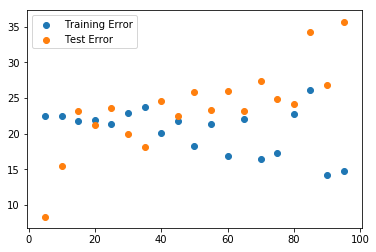

In [30]:
fig = plt.figure()
plt.scatter(split_sizes,training_errors, label='Training Error')
plt.scatter(split_sizes,test_errors,  label='Test Error')
plt.legend()
plt.show()

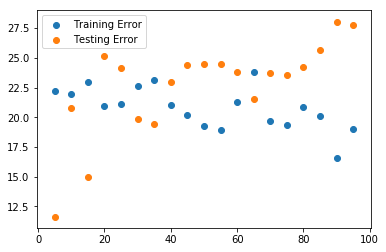

# Evaluating the effect of train-test split size: extension

Repeat the previous example, but for each train-test split size, generate 100 iterations of models/errors and save the average train/test error. This will help account for any particularly good/bad models that might have resulted from poor/good splits in the data. 

In [35]:
import random
random.seed(8)
split_sizes = list(range(5,100,5))
training_errors = []
test_errors = []

for size in split_sizes:
    temp_train_err = []
    temp_test_err = []
    
    for i in range(0,100):

        #create splits and train
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=size/100)
        linreg = LinearRegression().fit(x_train, y_train)
        
        #calculate mse on train and test
        y_train_hat = linreg.predict(x_train)
        mse_train = mean_squared_error(y_train, y_train_hat)
        temp_train_err.append(mse_train)
        temp_test_err.append( mean_squared_error(y_test, linreg.predict(x_test)))
    
    #average errors over 100 iterations for this split size
    training_errors.append(np.mean(temp_train_err))
    test_errors.append(np.mean(temp_test_err))

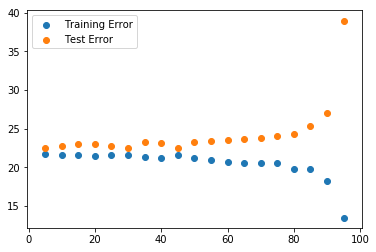

In [36]:
fig = plt.figure()
plt.scatter(split_sizes,training_errors, label='Training Error')
plt.scatter(split_sizes,test_errors,  label='Test Error')
plt.legend()
plt.show()

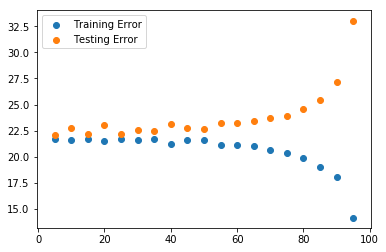

What's happening here? evaluate your result!

Start to overfit on training data and doesn't generalize well.

##  Summary 

Congratulations! You now practiced your knowledge on MSE and on using train-test-split.